In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel('Family Income and Expenditure.xlsx',usecols='A,B,C,D,M,N,AH')
pd.set_option('display.max_rows',None)
#Selecting the regions III-Central Luzon and NCR only
region_data = data.loc[data['Region'].str.contains('III - Central Luzon|NCR',
                                                regex=True)]

In [11]:
region_data = region_data.loc[data['Main Source of Income'].str.contains('III - Central Luzon|NCR',
                                                regex=True)]

HOUSEHOLD SIZE AND PSYCHOACTIVE DRUG CONSUMPTION

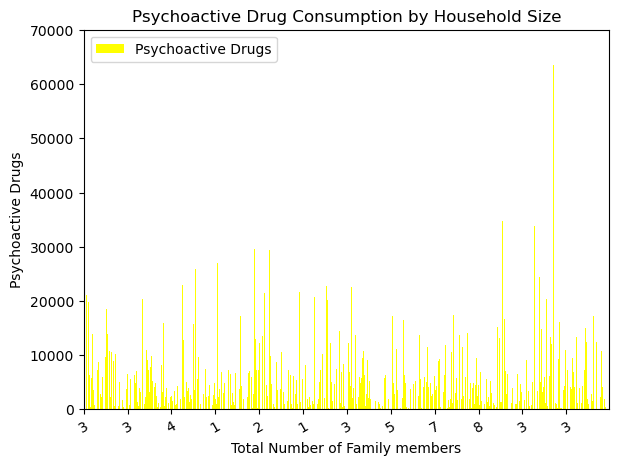

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel('Family Income and Expenditure.xlsx', usecols='A,B,C,D,M,N,AH')

data['Psychoactive Drugs'] = data['Alcoholic Beverages Expenditure'] + data['Tobacco Expenditure']

df_CL = data.loc[data['Region'].str.contains('III - Central Luzon', regex=True)]
df_CL = df_CL.reset_index(drop=True)
df_NCR = data.loc[data['Region'].str.contains('NCR', regex=True)]
df = pd.concat([df_CL, df_NCR])

familyconsumptionofPD = df_NCR[['Total Number of Family members', 'Psychoactive Drugs']]
graph = familyconsumptionofPD.plot.bar(x='Total Number of Family members', y='Psychoactive Drugs', rot=30, color='yellow', width=1)
plt.title('Psychoactive Drug Consumption by Household Size')
plt.xlabel('Total Number of Family members')
plt.ylabel('Psychoactive Drugs')
plt.tight_layout()
ax = plt.gca()
ax.locator_params(nbins=12, axis='x');

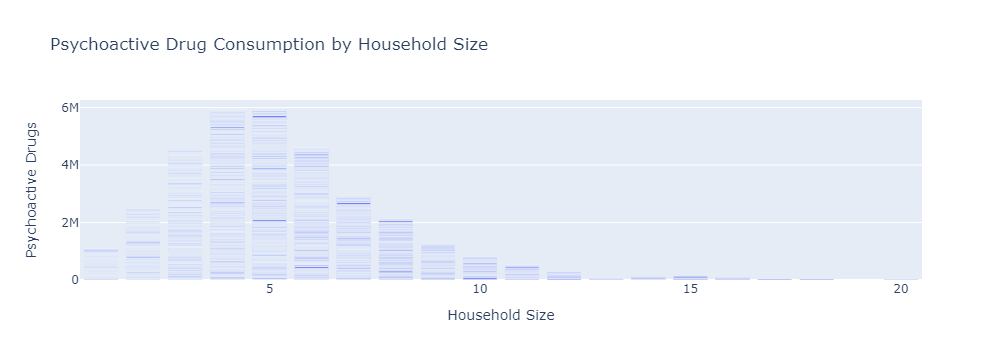

In [61]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel('Family Income and Expenditure.xlsx', usecols='A,B,C,D,M,N,AH')
df_CL = data.loc[data['Region'].str.contains('III - Central Luzon', regex=True)]
df_CL = df_CL.reset_index(drop=True)
familyconsumptionofPD = df[['Total Number of Family members', 'Psychoactive Drugs']]
fig1=px.bar(familyconsumptionofPD, x='Total Number of Family members', y='Psychoactive Drugs', labels={'Total Number of Family members':'Household Size','Psychoactive Drugs':'Psychoactive Drugs'},
            title = 'Psychoactive Drug Consumption by Household Size')
fig1.show()


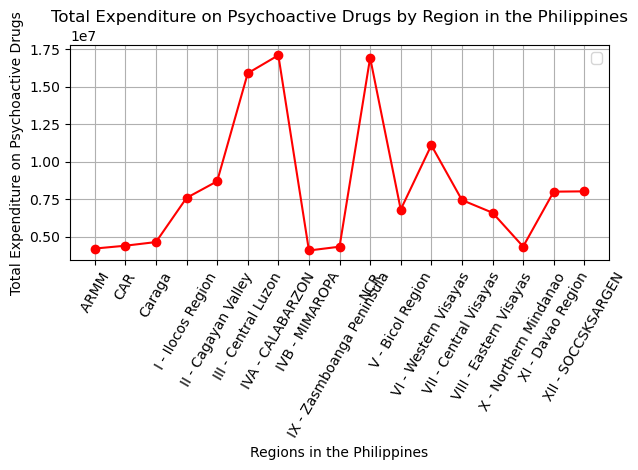

In [5]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel('Family Income and Expenditure.xlsx', usecols='A,B,C,D,M,N,AH')

data['Psychoactive Drugs'] = data['Alcoholic Beverages Expenditure'] + data['Tobacco Expenditure']

df_region = data.groupby('Region')['Psychoactive Drugs'].sum().reset_index()

plt.plot(df_region['Region'], df_region['Psychoactive Drugs'], color='red', marker='o')
plt.title('Total Expenditure on Psychoactive Drugs by Region in the Philippines')
plt.xlabel('Regions in the Philippines')
plt.ylabel('Total Expenditure on Psychoactive Drugs')
plt.xticks(rotation=60)
plt.grid(True)  # Add grid
plt.tight_layout()

handles, labels = plt.gca().get_legend_handles_labels()
labels = [f'{label/1000000:.2f}M' for label in labels]
plt.legend(handles, labels)

plt.show()


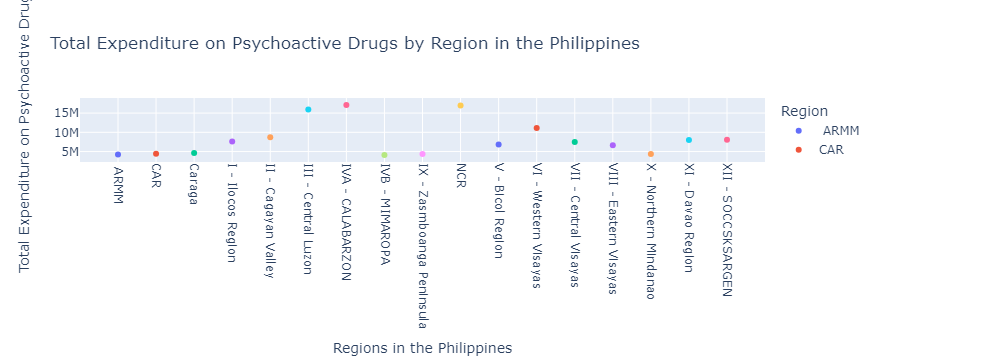

In [76]:
import pandas as pd
import plotly.express as px
%matplotlib inline

data = pd.read_excel('Family Income and Expenditure.xlsx', usecols='A,B,C,D,M,N,AH')

data['Psychoactive Drugs'] = data['Alcoholic Beverages Expenditure'] + data['Tobacco Expenditure']

df_region = data.groupby('Region')['Psychoactive Drugs'].sum().reset_index()

fig = px.scatter(df_region, x='Region', y='Psychoactive Drugs', color='Region',
                 title='Total Expenditure on Psychoactive Drugs by Region in the Philippines',
                 labels={'Region': 'Regions in the Philippines',
                         'Psychoactive Drugs': 'Total Expenditure on Psychoactive Drugs'})

fig.update_layout(xaxis={'tickangle': 90},
                  yaxis={'title': 'Total Expenditure on Psychoactive Drugs'},
                  legend={'title': 'Region'})

fig.show()


In [2]:
!pip install dash

  Using cached dash-2.11.1-py3-none-any.whl (10.4 MB)
  Using cached ansi2html-1.8.0-py3-none-any.whl (16 kB)
  Using cached retrying-1.3.4-py3-none-any.whl (11 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)


In [18]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

data = pd.read_excel('Family Income and Expenditure.xlsx', usecols='A,B,C,D,M,N,AH')

# Manipulate the data to create the 'Psychoactive Drugs' column
data['Psychoactive Drugs'] = data['Alcoholic Beverages Expenditure'] + data['Tobacco Expenditure']

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Animated Expenditure on Psychoactive Drugs by Region'),
    html.P("Select an animation:"),
    dcc.RadioItems(
        id='selection',
        options=[
            {"label": "Expenditure - Scatter", "value": "Expenditure - Scatter"},
            {"label": "Expenditure - Bar", "value": "Expenditure - Bar"}
        ],
        value='Expenditure - Scatter',
    ),
    dcc.Loading(dcc.Graph(id="graph"), type="cube")
])


@app.callback(
    Output("graph", "figure"), 
    Input("selection", "value"))
def display_animated_graph(selection):
    df_region = data.groupby('Region')['Psychoactive Drugs'].sum().reset_index()
    animations = {
        'Expenditure - Scatter': px.scatter(
            df_region, x='Region', y='Psychoactive Drugs', animation_frame='Region', 
            animation_group="Region", size='Psychoactive Drugs', color='Region', 
            hover_name="Region", log_x=False, size_max=55, 
            range_x=[0, df_region['Psychoactive Drugs'].max()], range_y=[0, 1000000],
            labels={'Region': 'Regions in the Philippines', 'Psychoactive Drugs': 'Total Expenditure on Psychoactive Drugs'}
        ),
        'Expenditure - Bar': px.bar(
            df_region, x='Region', y='Psychoactive Drugs', color='Region', 
            animation_frame='Region', animation_group="Region", 
            range_y=[0, 4000000],
            labels={'Region': 'Regions in the Philippines', 'Psychoactive Drugs': 'Total Expenditure on Psychoactive Drugs'}
        ),
    }
    return animations[selection]


if __name__ == '__main__':
    app.run_server(debug=True)

Trends of Values Explanation
Carl Edward S. Antiporda

2022106530

The aim of this program/code is to generate animated visualizations of expenditure on psychoactive drugs by region in the Philippines. Users can select between a scatter plot and a bar chart. The scatter plot visualizes the total expenditure for each region as points that move over time. The size and color of the points represent the magnitude and region, respectively. The bar chart shows the total expenditure for each region and there is also the line graph, scatter plot at animation plot to choose from. Users can interactively explore the data by hovering over the points or bars to see the region name and corresponding expenditure value. The animation provides a dynamic representation of the trends and changes in expenditure over time, offering an engaging and interactive visualization experience.
